In [58]:
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Define the file path
file_path = 'final_clean_data.csv'

# Load the dataset into a DataFrame
data = pd.read_csv(file_path)

# Convert the data variable to a DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
data.head()

,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,rentEstimate_lowerPrice,rentEstimate_currentPrice,rentEstimate_upperPrice,saleEstimate_lowerPrice,saleEstimate_currentPrice,saleEstimate_upperPrice,saleEstimate_confidenceLevel,saleEstimate_valueChange.numericChange,saleEstimate_valueChange.percentageChange,history_price
0,51.512982,-0.073698,1.0,2.0,79.0,0.0,Freehold,Flat/Maisonette,2350.0,2550.0,2800.0,444000.0,555000.0,666000.0,LOW,-29445000.0,-98.150000,30000000
1,51.511881,-0.073471,1.0,1.0,54.0,1.0,Leasehold,Purpose Built Flat,2150.0,2300.0,2450.0,447000.0,496000.0,546000.0,MEDIUM,46000.0,10.222222,450000
2,51.517972,-0.078028,2.0,2.0,73.0,1.0,Leasehold,Purpose Built Flat,2800.0,3000.0,3250.0,619000.0,651000.0,684000.0,HIGH,28000.0,4.494382,623000
3,51.517972,-0.078028,2.0,2.0,73.0,1.0,Leasehold,Purpose Built Flat,2800.0,3000.0,3250.0,619000.0,651000.0,684000.0,HIGH,28000.0,4.494382,600000
4,51.517972,-0.078028,2.0,2.0,73.0,1.0,Leasehold,Purpose Built Flat,2800.0,3000.0,3250.0,619000.0,651000.0,684000.0,HIGH,28000.0,4.494382,235000


In [59]:
# Maksimum fiyat değerini hesaplama
max_price = df["saleEstimate_currentPrice"].max()

# Fiyat aralıklarını dinamik olarak belirleme
price_bins = [0, max_price / 4, max_price / 2, (3 * max_price) / 4, max_price]
price_labels = ["very_low", "low", "medium", "high"]

# Fiyat aralıklarına göre kategorik hale getirme
df["price_range"] = pd.cut(
    df["saleEstimate_currentPrice"], bins=price_bins, labels=price_labels
)

# Maksimum alan değerini hesaplama
max_area = df["floorAreaSqM"].max()

# Alan aralıklarını dinamik olarak belirle
area_bins = [0, max_area / 3, (2 * max_area) / 3, max_area]
area_labels = ["small", "medium", "large"]

# Alan aralıklarına göre kategorik hale getirme
df["area_range"] = pd.cut(df["floorAreaSqM"], bins=area_bins, labels=area_labels)

# Oluşan kategorik sütunları kontrol etme
print(
    df[
        ["saleEstimate_currentPrice", "price_range", "floorAreaSqM", "area_range"]
    ].head()
)

   saleEstimate_currentPrice price_range  floorAreaSqM area_range
0                   555000.0    very_low          79.0      small
1                   496000.0    very_low          54.0      small
2                   651000.0    very_low          73.0      small
3                   651000.0    very_low          73.0      small
4                   651000.0    very_low          73.0      small


In [60]:
# Kategorik sütunları dummies'e dönüştürme
encoded_price_area = pd.get_dummies(df[['price_range', 'area_range']], prefix_sep='_')

# Dönüştürülen veriyi kontrol et
print(encoded_price_area.head())

# Orijinal df'den price_range ve area_range sütunlarını kaldır ve encode edilmişleri ekle
df = pd.concat([df.drop(columns=['price_range', 'area_range']), encoded_price_area], axis=1)

# Kontrol: Güncellenmiş DataFrame'i inceleyin
print(df.head())

   price_range_very_low  price_range_low  price_range_medium  \
0                  True            False               False   
1                  True            False               False   
2                  True            False               False   
3                  True            False               False   
4                  True            False               False   

   price_range_high  area_range_small  area_range_medium  area_range_large  
0             False              True              False             False  
1             False              True              False             False  
2             False              True              False             False  
3             False              True              False             False  
4             False              True              False             False  
    latitude  longitude  bathrooms  bedrooms  floorAreaSqM  livingRooms  \
0  51.512982  -0.073698        1.0       2.0          79.0          0.0   
1  

In [61]:
# Kullanılacak kategorik sütunların seçilmesi
categorical_columns = ['tenure', 'propertyType', 'saleEstimate_confidenceLevel']

# Kategorik sütunları dummies'e dönüştürme
encoded_data = pd.get_dummies(df[categorical_columns], prefix_sep='_')

# Dönüştürülen veriyi kontrol etme
print(encoded_data.head())

# Kategorik veriyi binary hale getirme
encoded_categorical = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

old_columns_categorical = ['tenure', 'propertyType', 'saleEstimate_confidenceLevel', 'price_range', 'area_range']

print(encoded_categorical.head())


   tenure_Feudal  tenure_Freehold  tenure_Leasehold  tenure_Shared  \
0          False             True             False          False   
1          False            False              True          False   
2          False            False              True          False   
3          False            False              True          False   
4          False            False              True          False   

   tenure_Unknown  propertyType_Bungalow Property  \
0           False                           False   
1           False                           False   
2           False                           False   
3           False                           False   
4           False                           False   

   propertyType_Converted Flat  propertyType_Detached Bungalow  \
0                        False                           False   
1                        False                           False   
2                        False                           False

In [62]:
# # Sayısal sütunları belirli aralıklara ayırarak etiketleme
# numerical_columns = [
#     'latitude', 'longitude', 'bathrooms', 'bedrooms', 'livingRooms',
#     'floorAreaSqM', 'rentEstimate_lowerPrice', 'rentEstimate_currentPrice',
#     'rentEstimate_upperPrice', 'saleEstimate_lowerPrice', 'saleEstimate_currentPrice',
#     'saleEstimate_upperPrice', 'saleEstimate_valueChange.numericChange',
#     'saleEstimate_valueChange.percentageChange', 'history_price'
# ]

# # Her bir sayısal sütunu etiketleme
# for column in numerical_columns:
#     # Veriyi belirli aralıklara bölelim
#     bins = 4  # 4 aralığa bölme (isteğe göre artırılabilir)
#     labels = [f"{column}_bin_{i}" for i in range(bins)]
#     df[column] = pd.cut(df[column], bins=bins, labels=labels)

# # Label encoding yerine one-hot encoding uygulama
# encoded_numerical = pd.get_dummies(df, columns=numerical_columns, drop_first=True)

# Sayısal sütunlar
numerical_columns = [
    "latitude",
    "longitude",
    "bathrooms",
    "bedrooms",
    "livingRooms",
    "floorAreaSqM",
    "rentEstimate_lowerPrice",
    "rentEstimate_currentPrice",
    "rentEstimate_upperPrice",
    "saleEstimate_lowerPrice",
    "saleEstimate_currentPrice",
    "saleEstimate_upperPrice",
    "saleEstimate_valueChange.numericChange",
    "saleEstimate_valueChange.percentageChange",
    "history_price",
]

# Her bir sayısal sütun için aralıklar ve etiketler oluşturma
for column in numerical_columns:
    max_value = df[column].max()  # Maksimum değeri al
    bins = [
        0,
        max_value / 4,
        max_value / 2,
        (3 * max_value) / 4,
        max_value,
    ]  # 4 eşit aralığa böl
    labels = [
        f"{column}_very_low",
        f"{column}_low",
        f"{column}_medium",
        f"{column}_high",
    ]

    # Aralıklara göre kategorik sütun oluşturma
    df[f"{column}_range"] = pd.cut(df[column], bins=bins, labels=labels)

# Kontrol et
print(df.head())

    latitude  longitude  bathrooms  bedrooms  floorAreaSqM  livingRooms  \
0  51.512982  -0.073698        1.0       2.0          79.0          0.0   
1  51.511881  -0.073471        1.0       1.0          54.0          1.0   
2  51.517972  -0.078028        2.0       2.0          73.0          1.0   
3  51.517972  -0.078028        2.0       2.0          73.0          1.0   
4  51.517972  -0.078028        2.0       2.0          73.0          1.0   

      tenure        propertyType  rentEstimate_lowerPrice  \
0   Freehold     Flat/Maisonette                   2350.0   
1  Leasehold  Purpose Built Flat                   2150.0   
2  Leasehold  Purpose Built Flat                   2800.0   
3  Leasehold  Purpose Built Flat                   2800.0   
4  Leasehold  Purpose Built Flat                   2800.0   

   rentEstimate_currentPrice  ...     floorAreaSqM_range  \
0                     2550.0  ...  floorAreaSqM_very_low   
1                     2300.0  ...  floorAreaSqM_very_low   
2 

In [63]:
# Yeni oluşturulan sütunlar
range_columns = [f"{col}_range" for col in numerical_columns]

# Kategorik sütunlar ve mevcut kategorik sütunlar
categorical_columns = range_columns + ['tenure', 'propertyType', 'saleEstimate_confidenceLevel']

# One-hot encoding uygulama
encoded_numerical = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

old_columns_numerical = ['latitude', 'longitude', 'bathrooms', 'bedrooms', 'livingRooms',
    'floorAreaSqM', 'rentEstimate_lowerPrice', 'rentEstimate_currentPrice',
    'rentEstimate_upperPrice', 'saleEstimate_lowerPrice', 'saleEstimate_currentPrice',
    'saleEstimate_upperPrice', 'saleEstimate_valueChange.numericChange',
    'saleEstimate_valueChange.percentageChange', 'history_price']

encoded_numerical.drop(columns=old_columns_numerical, inplace=True)

# Kontrol et
print(encoded_numerical.head())

# Eksik değerleri kontrol et
print(sum(encoded_data.isnull().sum()))



   price_range_very_low  price_range_low  price_range_medium  \
0                  True            False               False   
1                  True            False               False   
2                  True            False               False   
3                  True            False               False   
4                  True            False               False   

   price_range_high  area_range_small  area_range_medium  area_range_large  \
0             False              True              False             False   
1             False              True              False             False   
2             False              True              False             False   
3             False              True              False             False   
4             False              True              False             False   

   latitude_range_latitude_low  latitude_range_latitude_medium  \
0                        False                           False   
1             

In [64]:
# Kategorik ve sayısal verileri birleştirme
prepared_data = pd.concat([encoded_categorical, encoded_numerical], axis=1)
prepared_data.dropna(inplace=True)
prepared_data.drop(columns=old_columns_numerical, inplace=True)
print(prepared_data.head())
print(prepared_data.dtypes)

   price_range_very_low  price_range_low  price_range_medium  \
0                  True            False               False   
1                  True            False               False   
2                  True            False               False   
3                  True            False               False   
4                  True            False               False   

   price_range_high  area_range_small  area_range_medium  area_range_large  \
0             False              True              False             False   
1             False              True              False             False   
2             False              True              False             False   
3             False              True              False             False   
4             False              True              False             False   

   tenure_Freehold  tenure_Leasehold  tenure_Shared  ...  \
0             True             False          False  ...   
1            False        

In [65]:
# Hangi sütunların 0-1 formatında olmadığını kontrol etme
invalid_columns = prepared_data.applymap(lambda x: x in [0, 1]).all()
print("0-1 formatında olmayan sütunlar:")
print(invalid_columns[invalid_columns == False].index)

prepared_data.dropna(inplace=True)

# Verinin sadece 0-1 değerlerinden oluştuğunu kontrol edin
assert prepared_data.applymap(lambda x: x in [0, 1]).all().all(), "Tüm değerler 0 veya 1 değil!"


C:\Users\HP\AppData\Local\Temp\ipykernel_25640\1745811302.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  invalid_columns = prepared_data.applymap(lambda x: x in [0, 1]).all()


0-1 formatında olmayan sütunlar:
Index([], dtype='object')


C:\Users\HP\AppData\Local\Temp\ipykernel_25640\1745811302.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  assert prepared_data.applymap(lambda x: x in [0, 1]).all().all(), "Tüm değerler 0 veya 1 değil!"


In [66]:
fp_data = prepared_data.copy()

frequent_itemsets = apriori(fp_data, min_support=0.1, use_colnames=True)


print("Frequent Itemsets:")
print(frequent_itemsets)


# Extracting Association Rules
rules = association_rules(
    frequent_itemsets, num_itemsets=len(fp_data), metric="lift", min_threshold=1.0
)


print("Association Rules:")
print(rules)

Frequent Itemsets:
       support                                           itemsets
0     0.997086                             (price_range_very_low)
1     0.898971                                 (area_range_small)
2     0.393838                                  (tenure_Freehold)
3     0.584486                                 (tenure_Leasehold)
4     0.124580                      (propertyType_Converted Flat)
...        ...                                                ...
3002  0.137660  (tenure_Leasehold, saleEstimate_confidenceLeve...
3003  0.100406  (propertyType_Mid Terrace House, bedrooms_rang...
3004  0.100406  (propertyType_Mid Terrace House, bedrooms_rang...
3005  0.100406  (propertyType_Mid Terrace House, bedrooms_rang...
3006  0.100406  (propertyType_Mid Terrace House, bedrooms_rang...

[3007 rows x 2 columns]
Association Rules:
                              antecedents  \
0                      (area_range_small)   
1                  (price_range_very_low)   
2         

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


In [67]:
high_lift_rules = rules[rules['lift'] > 1.5]
print("High Lift Rules:")
print(high_lift_rules)

High Lift Rules:
                                            antecedents  \
28                     (propertyType_Mid Terrace House)   
29                                    (tenure_Freehold)   
32                        (bedrooms_range_bedrooms_low)   
33                                    (tenure_Freehold)   
34                  (livingRooms_range_livingRooms_low)   
...                                                 ...   
1509  (livingRooms_range_livingRooms_low, area_range...   
1510  (livingRooms_range_livingRooms_low, price_rang...   
1511                      (bedrooms_range_bedrooms_low)   
1512                                  (tenure_Freehold)   
1514                (livingRooms_range_livingRooms_low)   

                                            consequents  antecedent support  \
28                                    (tenure_Freehold)            0.178416   
29                     (propertyType_Mid Terrace House)            0.393838   
32                                   

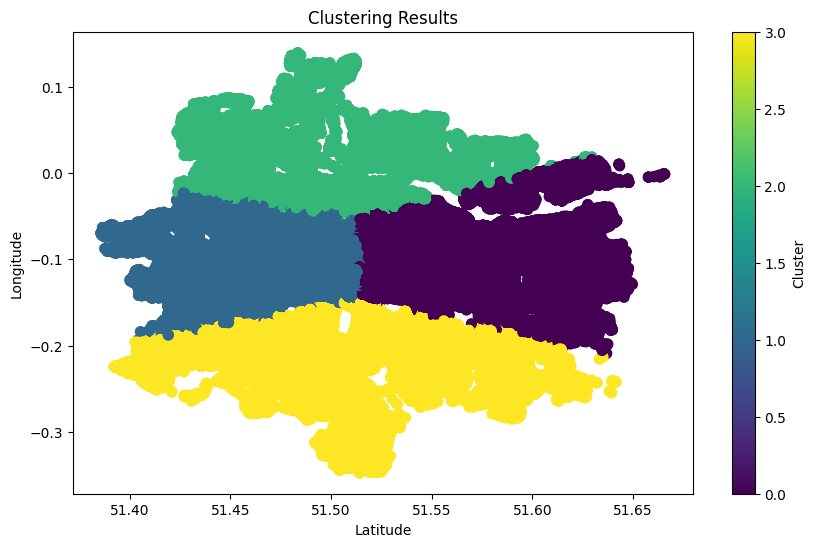

In [68]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# K-means clustering veya diğer cluster sonuçlarınız (örnek)
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['latitude', 'longitude']])

# Kümeleri renklerle göstermek için scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['latitude'], df['longitude'], c=df['cluster'], cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.title('Clustering Results')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()


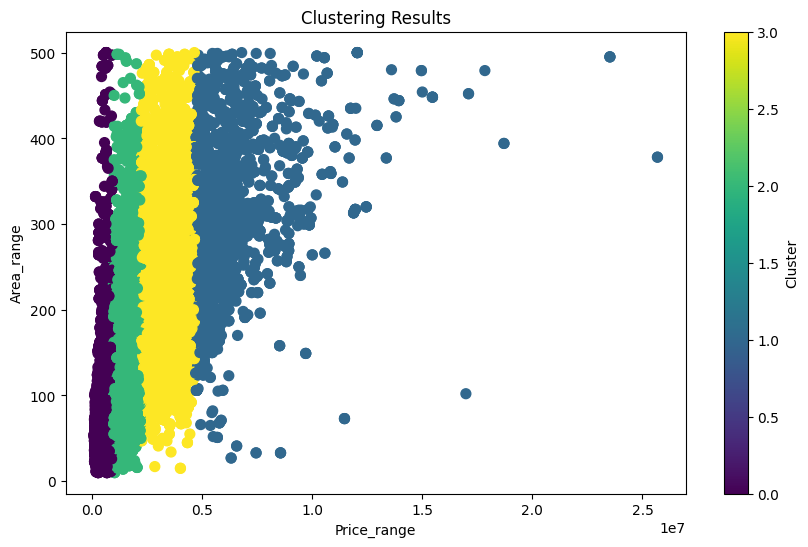

In [69]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# K-means clustering veya diğer cluster sonuçlarınız (örnek)
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['saleEstimate_currentPrice', 'floorAreaSqM']])

# Kümeleri renklerle göstermek için scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['saleEstimate_currentPrice'], df['floorAreaSqM'], c=df['cluster'], cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.title('Clustering Results')
plt.xlabel('Price_range')
plt.ylabel('Area_range')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_25640\4220763041.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=support_values, y=labels, palette="viridis")


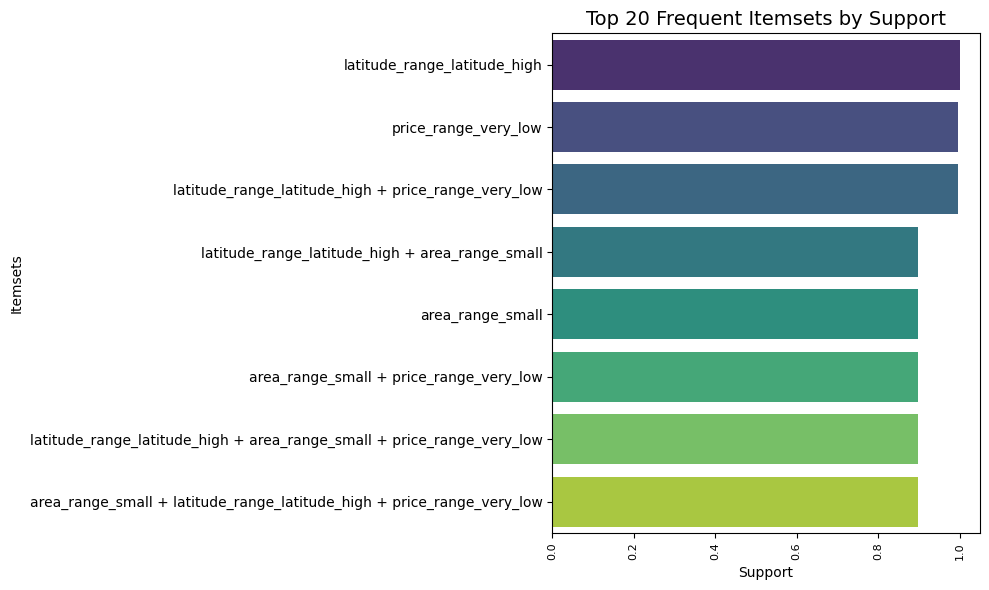

In [70]:
import seaborn as sns

# En sık öğe kümelerini sıraya göre sıralama
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

# İlk n öğeyi seçme (opsiyonel)
top_n = 20  # İlk 20 öğeyi çizmek için
top_frequent_itemsets = frequent_itemsets.head(top_n)

# Prepare data for plotting
labels = [" + ".join(map(str, itemset)) for itemset in top_frequent_itemsets['itemsets']]
support_values = top_frequent_itemsets['support']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=support_values, y=labels, palette="viridis")
plt.title(f"Top {top_n} Frequent Itemsets by Support", fontsize=14)
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

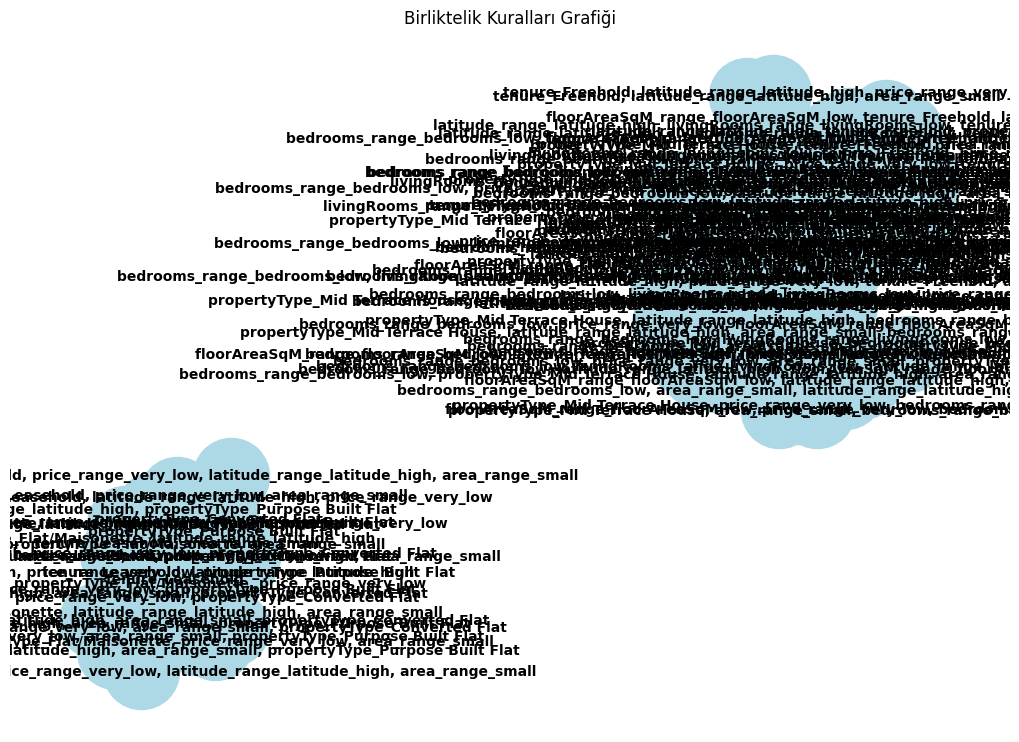

In [71]:
# Örnek görselleştirme
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
for i, rule in high_lift_rules.iterrows():
    antecedents = ', '.join(rule['antecedents'])
    consequents = ', '.join(rule['consequents'])
    G.add_edge(antecedents, consequents, weight=rule['lift'])

plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"Lift: {d['weight']:.2f}" for u, v, d in G.edges(data=True)})
plt.title("Birliktelik Kuralları Grafiği")
plt.show()